<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/InvestmentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

Following CRISP-DM Methodology
------------------------------------
CRISP-DM : Step#2 Data Understanding


In [0]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

#for companies , suggested encoding
companies = pd.read_csv('companies.txt',  sep="\t", encoding='palmos')
print("=========================== TABLE COMPANIES ==============================================")
print (companies.head())
print("==========================================================================================")

rounds2 = pd.read_csv('rounds2.csv', encoding='palmos')
print("=========================== TABLE ROUND2 =================================================")
print (rounds2.head())
print("==========================================================================================")


mapping = pd.read_csv('mapping.csv')
print("=========================== TABLE MAPPING ================================================")
print (mapping.head())
print("==========================================================================================")





=========================== TABLE COMPANIES ==============================================
                             permalink                    name                       homepage_url                                      category_list     status country_code state_code                 region           city  founded_at
0                  /Organization/-Fame                   #fame                 http://livfame.com                                              Media  operating          IND         16                 Mumbai         Mumbai         NaN
1               /Organization/-Qounter                :Qounter             http://www.qounter.com  Application Platforms|Real Time|Social Network...  operating          USA         DE             DE - Other  Delaware City  04-09-2014
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.                http://oneofthem.jp                                  Apps|Games|Mobile  operating          NaN        NaN                    NaN 

In [0]:
#unique companies in companies
print ("Total Records: " + str(len(companies['permalink'].tolist())))
print ("Total Unique: " + str(len(companies['permalink'].unique().tolist())))
print ("Total Unique Names: " + str(len(companies['name'].unique().tolist())))
print ("Total Unique URL: " + str(len(companies['homepage_url'].unique().tolist())))
print ("Total Unique Categories: " + str(len(companies['category_list'].unique().tolist())))
print ("Total Unique Status: " + str(len(companies['status'].unique().tolist())))

companies.describe()


Total Records: 66368
Total Unique: 66368
Total Unique Names: 66103
Total Unique URL: 61192
Total Unique Categories: 27297
Total Unique Status: 4


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Plazes,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [0]:
#unique companies in rounds2
print ("Total Records: " + str(len(rounds2['company_permalink'].tolist())))
print ("Total Unique: " + str(len(rounds2['company_permalink'].unique().tolist())))

rounds2.head()


Total Records: 114949
Total Unique: 90247


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [0]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [0]:

rounds2.describe()

,raised_amount_usd
count,94959.00
mean,10426869.33
std,114821247.98
min,0.00
25%,322500.00
50%,1680511.00
75%,7000000.00
max,21271935000.00


In [0]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [0]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


----------------------------------
CRISP-DM : Step#3 Data Preparation
----------------------------------


1. permalink and company_permalink are unique ID fields which seem to have diffrent cases
2. Need to check for null values

In [0]:
# Fix Cases to better match
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

print(companies.head())
print("======================")
print(rounds2.head())


#check if some ID are null
nullID_Companies  = np.where(pd.isnull(companies['permalink']))
nullID_Rounds2  = np.where(pd.isnull(rounds2['company_permalink']))

print (nullID_Companies)
print (nullID_Rounds2)


#check if some ID are empty
emptyID_Companies  = np.where(companies['permalink']=='')
emptyID_Rounds2  = np.where(rounds2['company_permalink']=='')

print (emptyID_Companies)
print (emptyID_Rounds2)




                             permalink                    name                       homepage_url                                      category_list     status country_code state_code                 region           city  founded_at
0                  /organization/-fame                   #fame                 http://livfame.com                                              Media  operating          IND         16                 Mumbai         Mumbai         NaN
1               /organization/-qounter                :Qounter             http://www.qounter.com  Application Platforms|Real Time|Social Network...  operating          USA         DE             DE - Other  Delaware City  04-09-2014
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.                http://oneofthem.jp                                  Apps|Games|Mobile  operating          NaN        NaN                    NaN            NaN         NaN
3                /organization/0-6-com                 0-6.com  

In [0]:
#recheck unique and describe again
print ("Companies Total Unique: " + str(len(companies['permalink'].unique().tolist())))
print ("Rounds2 Total Unique: " + str(len(rounds2['company_permalink'].unique().tolist())))


Companies Total Unique: 66368
Rounds2 Total Unique: 66368


In [0]:
#check if some values are in rounds2 which dont exist in companies

existStatus = rounds2.company_permalink.isin(companies.permalink).astype(int)
rounds2['existsInCompanies'] = existStatus
print (rounds2[rounds2['existsInCompanies'] == 0])


Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, existsInCompanies]
Index: []


In [0]:
# no ID in rounds2 which dont exist in companies
#drop the new column
rounds2.drop('existsInCompanies',axis=1, inplace=True)

In [0]:
# join both dataframes
master_frame = pd.merge(companies, rounds2, left_on=['permalink'], 
             right_on= ['company_permalink'], how='outer')

print ("Total Records: " + str(len(master_frame['permalink'].tolist())))
master_frame.head(2)

Total Records: 114949


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan


In [0]:
# check for other important columns as per business goal
#most important fields are :
#funding_round_type
#country_code
#category_list
#raised_amount_usd


round(100*(master_frame.isnull().sum()/len(master_frame.index)))


permalink                  0.00
name                       0.00
homepage_url               5.00
category_list              3.00
status                     0.00
country_code               8.00
state_code                10.00
region                     9.00
city                       9.00
founded_at                18.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        73.00
funded_at                  0.00
raised_amount_usd         17.00
dtype: float64

funding_round_type : No value missing, No action needed

country_code : 8% values missing , will remove after funding round type analysis
as this can not be imputed.

category_list : 3% values missing, will impute by "other" before sector analysis

raised_amount_usd : 17% values missing, this is very important and critical value. Imputing depends on sector, round, country. Making it complicated to impute. 

Decision : Drop the records which do not have this critical value 


In [0]:
#remove rows which does not have raised_amount_usd
master_frame.drop(master_frame[master_frame['raised_amount_usd'].isnull()].index, inplace = True) 

#remove rows which does not have country code
master_frame.drop(master_frame[master_frame['country_code'].isnull()].index, inplace = True) 

#remove unneccesary columns founded_at, homepage_url , funding_round_code, state_code, region and city
#master_frame.drop(['founded_at','homepage_url', 'funding_round_code','state_code', 'region', 'city'],  axis=1, inplace=True)

#impute missing values of category_list with "Other"
master_frame["category_list"].fillna("Other", inplace=True)

#reduce country code to lowercase
#master_frame['country_code'] = master_frame['country_code'].str.lower()
master_frame.shape 


(89108, 16)

In [0]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)))

permalink                  0.00
name                       0.00
homepage_url               4.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 2.00
region                     1.00
city                       1.00
founded_at                15.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

# Checkpoint 2 : Identify the Suitable Funding Type

In [0]:
#check intersted Funding Types
interestedFundingTypes = ['angel', 'seed', 'private_equity','venture']
FundingTypes = master_frame[master_frame['funding_round_type'].isin(interestedFundingTypes)].groupby('funding_round_type')

FundingTypes.describe()


raised_amount_usd                                                                                
                               count        mean          std  min        25%         50%         75%            max
funding_round_type                                                                                                  
angel                        4427.00   968559.91   7687646.48 0.00  151795.00   410737.00  1000000.00   494511992.00
private_equity               1835.00 73618563.62 201004568.14 0.00 5000000.00 20000000.00 75020002.50  4745460219.00
seed                        21233.00   748104.50   2283104.30 0.00   68525.00   300000.00  1000000.00   200000000.00
venture                     48111.00 11735779.94  87951087.86 0.00 1603911.50  5000000.00 12000000.00 17600000000.00

--------------------------------------------------------------------------

venture fund suits best as median funding is 5 million dollars

--------------------------------------------------------------------------
(Taking median value as its less affected by outlier values.)

## Checkpoint 3 :
 
a) Identify top9 countries with funding

b) Identify top3 english speaking countries
 

In [0]:
#select venture funding data
VentureFundingDF = master_frame[master_frame['funding_round_type'] == 'venture']
VentureFundingDF.shape



(48111, 16)

In [0]:

CountryVentureFundingDF = VentureFundingDF.groupby('country_code')
top9 = CountryVentureFundingDF['raised_amount_usd'].sum().sort_values(ascending=False).head(9).reset_index()
print (top9.head(9))


  country_code  raised_amount_usd
0          USA    422510842796.00
1          CHN     39835418773.00
2          GBR     20245627416.00
3          IND     14391858718.00
4          CAN      9583332317.00
5          FRA      7259536732.00
6          ISR      6907514579.00
7          DEU      6346959822.00
8          JPN      3363676611.00


As seen above, top 3 English Speaking Countries are USA, GBR and IND

# Checkpoint 4 : Sector Analysis 1

Find the best sectors in these countries.


In [0]:
selected_countries = ['USA', 'GBR', 'IND']

SelectedCountriesData = VentureFundingDF[VentureFundingDF['country_code'].isin(selected_countries)]

print (SelectedCountriesData.head(5))


                     permalink          name                homepage_url                     category_list     status country_code state_code       region           city  founded_at           company_permalink                          funding_round_permalink funding_round_type funding_round_code   funded_at  raised_amount_usd
0          /organization/-fame         #fame          http://livfame.com                             Media  operating          IND         16       Mumbai         Mumbai         NaN         /organization/-fame  /funding-round/9a01d05418af9f794eebff7ace91f638            venture                  B  05-01-2015        10000000.00
10        /organization/0xdata        H2O.ai              http://h2o.ai/                         Analytics  operating          USA         CA  SF Bay Area  Mountain View  01-01-2011        /organization/0xdata  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture                  B  09-11-2015        20000000.00
11        /organ

In [0]:
#remove null values from mappings
mapping.drop(mapping[mapping['category_list'].isnull()].index, inplace = True) 

In [0]:
#process mapping
widenedMapping =pd.melt(mapping, id_vars='category_list', var_name='main_sector')
widenedMapping.drop(widenedMapping[widenedMapping['value'] == 0].index, inplace = True) 
widenedMapping.drop('value', axis =1, inplace = True) 
print(widenedMapping.head(1))

      category_list          main_sector
7  Adventure Travel  Automotive & Sports


In [0]:
SelectedCountriesData['primary_sector'] = SelectedCountriesData['category_list'].apply(lambda x: x.split('|')[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#lowercase
SelectedCountriesData['primary_sector'] = SelectedCountriesData['primary_sector'].str.lower()
widenedMapping['category_list'] = widenedMapping['category_list'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
print (SelectedCountriesData)
print (widenedMapping)

                         permalink          name                homepage_url                     category_list     status country_code state_code       region           city  founded_at           company_permalink                          funding_round_permalink funding_round_type funding_round_code   funded_at  raised_amount_usd primary_sector
0              /organization/-fame         #fame          http://livfame.com                             Media  operating          IND         16       Mumbai         Mumbai         NaN         /organization/-fame  /funding-round/9a01d05418af9f794eebff7ace91f638            venture                  B  05-01-2015        10000000.00          media
10            /organization/0xdata        H2O.ai              http://h2o.ai/                         Analytics  operating          USA         CA  SF Bay Area  Mountain View  01-01-2011        /organization/0xdata  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture                  B  09-1

In [0]:
# join for main sector
sectoralAnalysis = pd.merge(SelectedCountriesData, widenedMapping, left_on=['primary_sector'], 
             right_on= ['category_list'], how='left')

sectoralAnalysis.drop(['funding_round_permalink','status', 'funded_at' ], axis=1, inplace=True)



In [0]:
print (sectoralAnalysis)

                        permalink          name                homepage_url                   category_list_x country_code state_code       region           city  founded_at           company_permalink funding_round_type funding_round_code  raised_amount_usd primary_sector category_list_y                 main_sector
0             /organization/-fame         #fame          http://livfame.com                             Media          IND         16       Mumbai         Mumbai         NaN         /organization/-fame            venture                  B        10000000.00          media           media               Entertainment
1            /organization/0xdata        H2O.ai              http://h2o.ai/                         Analytics          USA         CA  SF Bay Area  Mountain View  01-01-2011        /organization/0xdata            venture                  B        20000000.00      analytics             NaN                         NaN
2            /organization/0xdata        H2O.a

In [0]:
#some of the main sectors seem NaN lets check
nullSector = sectoralAnalysis[sectoralAnalysis['main_sector'].isnull()]
print(sectoralAnalysis.shape)
print(nullSector.shape)

print(round(100*(sectoralAnalysis['main_sector'].isnull().sum()/len(sectoralAnalysis.index))))
print(nullSector['raised_amount_usd'].sum())
print(sectoralAnalysis['raised_amount_usd'].sum())
print ("Missing Investing Sum : " + str(round(100*nullSector['raised_amount_usd'].sum()/sectoralAnalysis['raised_amount_usd'].sum())) + "%")



(39018, 16)
(2831, 16)
7.0
32448375981.0
457148328930.0
Missing Investing Sum : 7.0%


Since the rows whose main sectors are missing are ~7% as per Value and count. We will drop them.

In [0]:
#we will drop rows with main sector NaN as they are nor nyc
sectoralAnalysis.drop(sectoralAnalysis[sectoralAnalysis['main_sector'].isnull()].index, inplace = True) 

print (sectoralAnalysis)

                           permalink             name                homepage_url                   category_list_x country_code state_code       region           city  founded_at              company_permalink funding_round_type funding_round_code  raised_amount_usd primary_sector category_list_y                 main_sector
0                /organization/-fame            #fame          http://livfame.com                             Media          IND         16       Mumbai         Mumbai         NaN            /organization/-fame            venture                  B        10000000.00          media           media               Entertainment
4         /organization/1-mainstream     1 Mainstream  http://www.1mainstream.com  Apps|Cable|Distribution|Software          USA         CA  SF Bay Area      Cupertino  01-03-2012     /organization/1-mainstream            venture                NaN         5000000.00           apps            apps  News, Search and Messaging
5      /organizatio

sectoralAnalysis is the dataframe for Checkpoint#4

## Checkpoint 5: Sector Analysis 2

In [0]:
# Create country specific dataframes with USA (D1), GBR (D2), IND (D3)
# range of funding preferred by Spark Funds is 5 to 15 million USD.
D1 = sectoralAnalysis[sectoralAnalysis['country_code'] == 'USA']
D1 = D1 [(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

D2 = sectoralAnalysis[sectoralAnalysis['country_code'] == 'GBR']
D2 = D2 [(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

D3 = sectoralAnalysis[sectoralAnalysis['country_code'] == 'IND']
D3 = D3 [(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

print(D1)
print(D2)
print(D3)

                             permalink               name                   homepage_url                                    category_list_x country_code state_code       region           city  founded_at                company_permalink funding_round_type funding_round_code  raised_amount_usd         primary_sector        category_list_y                              main_sector
4           /organization/1-mainstream       1 Mainstream     http://www.1mainstream.com                   Apps|Cable|Distribution|Software          USA         CA  SF Bay Area      Cupertino  01-03-2012       /organization/1-mainstream            venture                NaN         5000000.00                   apps                   apps               News, Search and Messaging
17        /organization/128-technology     128 Technology  http://www.128technology.com/                       Service Providers|Technology          USA         MA       Boston     Burlington  07-07-2014     /organization/128-technology  

In [0]:
print( D1['raised_amount_usd'].sum() )
print( D2['raised_amount_usd'].sum() )
print( D3['raised_amount_usd'].sum() )

99661524549.0
5028704358.0
2683537552.0


In [0]:
D1_SectorWise = D1.groupby('main_sector')
print(D1_SectorWise['main_sector'].count().sort_values(ascending=False).head(3))
print(D1_SectorWise['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: main_sector, dtype: int64
main_sector
Others                                    26089280296.00
Cleantech / Semiconductors                21181003033.00
Social, Finance, Analytics, Advertising   16680695048.00
Name: raised_amount_usd, dtype: float64


In [0]:
D2_SectorWise = D2.groupby('main_sector')
print(D2_SectorWise['main_sector'].count().sort_values(ascending=False).head(3))
print(D2_SectorWise['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: main_sector, dtype: int64
main_sector
Others                                    1249124289.00
Cleantech / Semiconductors                1136905008.00
Social, Finance, Analytics, Advertising    821888357.00
Name: raised_amount_usd, dtype: float64


In [0]:
D3_SectorWise = D3.groupby('main_sector')
print(D3_SectorWise['main_sector'].count().sort_values(ascending=False).head(3))
print(D3_SectorWise['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: main_sector, dtype: int64
main_sector
Others                                    1007409507.00
News, Search and Messaging                 433834545.00
Social, Finance, Analytics, Advertising    290543500.00
Name: raised_amount_usd, dtype: float64


In [0]:
#check which company received Highest Investment in D1
SectorName = 'Others'
D1_MaxInvest =  D1[D1['main_sector'] == SectorName].groupby('permalink')
print(D1_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

SectorName = 'Cleantech / Semiconductors'
D1_MaxInvest =  D1[D1['main_sector'] == SectorName].groupby('permalink')
print(D1_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

permalink
/organization/virtustream         64300000.00
/organization/capella             54968051.00
/organization/airtight-networks   54201907.00
Name: raised_amount_usd, dtype: float64
permalink
/organization/biodesix        75300000.00
/organization/tigo-energy     68739496.00
/organization/forsight-labs   61300001.00
Name: raised_amount_usd, dtype: float64


In [0]:

SectorName = 'Others'
D2_MaxInvest =  D2[D2['main_sector'] == SectorName].groupby('permalink')
print(D2_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

SectorName = 'Cleantech / Semiconductors'
D2_MaxInvest =  D2[D2['main_sector'] == SectorName].groupby('permalink')
print(D2_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

permalink
/organization/electric-cloud   37000000.00
/organization/sensage          36250000.00
/organization/enigmatic        32500000.00
Name: raised_amount_usd, dtype: float64
permalink
/organization/eusa-pharma                                                     35600000.00
/organization/horizon-discovery                                               31353719.00
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h   29132906.00
Name: raised_amount_usd, dtype: float64


In [0]:
SectorName = 'Others'
D3_MaxInvest =  D3[D3['main_sector'] == SectorName].groupby('permalink')
print(D3_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

SectorName = 'News, Search and Messaging'
D3_MaxInvest =  D3[D3['main_sector'] == SectorName].groupby('permalink')
print(D3_MaxInvest['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

permalink
/organization/firstcry-com   39000000.00
/organization/myntra         38000000.00
/organization/commonfloor    32900000.00
Name: raised_amount_usd, dtype: float64
permalink
/organization/gupshup-technology-india-pvt-ltd   33000000.00
/organization/imimobile                          23000000.00
/organization/sms-gupshup                        22000000.00
Name: raised_amount_usd, dtype: float64


## **Checkpoint 6: Plots**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

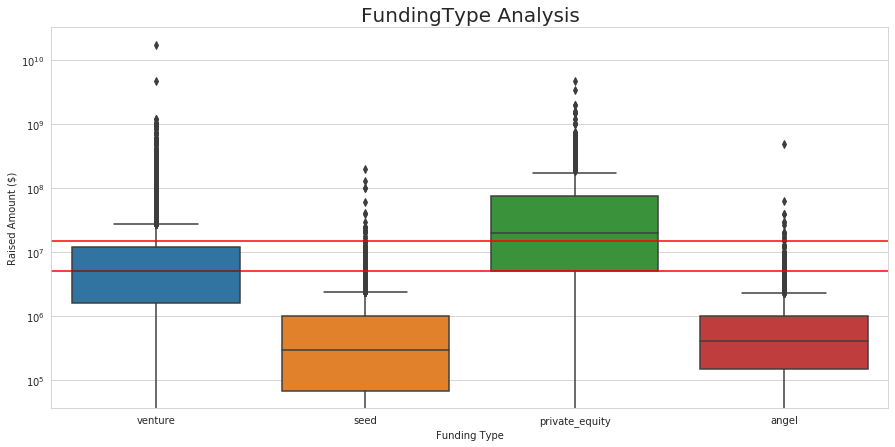

In [0]:
interestedFundingTypes = ['angel', 'seed', 'private_equity','venture']
FundingTypes = master_frame[master_frame['funding_round_type'].isin(interestedFundingTypes)]

plt.figure(figsize=(15, 7))
plt.yscale('log')

snsPlot = sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=FundingTypes)

snsPlot.set(xlabel='Funding Type', ylabel='Raised Amount ($)')
snsPlot.set_title('FundingType Analysis',fontsize =20)

plt.axhline(y = 5000000, color = 'r', label = "Low")
plt.axhline(y = 15000000, color='r',  label = "Hi")



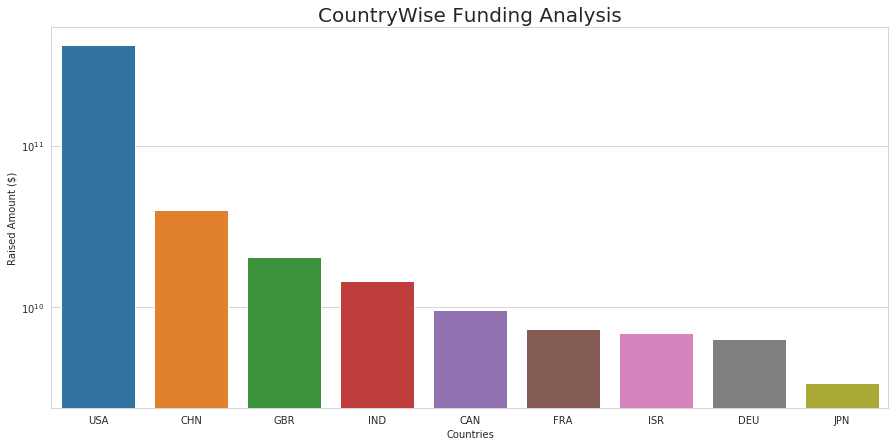

In [0]:
plt.figure(figsize=(15,7))
plt.yscale('log')
#clrs = ['grey' if (top9['country_code'].isin(selected_countries)) else 'red' for x in top9['country_code'] ]

snsPlot2=sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
snsPlot2.set(xlabel='Countries', ylabel='Raised Amount ($)')
snsPlot2.set_title('CountryWise Funding Analysis',fontsize =20)
plt.show()

In [0]:

D1_InvestmentCounts = D1_SectorWise['raised_amount_usd'].count().sort_values(ascending=False).head(3).reset_index()
D1_InvestmentCounts['country'] = 'USA'
#print(D1_InvestmentCounts.head())

D2_InvestmentCounts = D2_SectorWise['raised_amount_usd'].count().sort_values(ascending=False).head(3).reset_index()
D2_InvestmentCounts['country'] = 'GBR'
#print(D2_InvestmentCounts.head())

D3_InvestmentCounts = D3_SectorWise['raised_amount_usd'].count().sort_values(ascending=False).head(3).reset_index()
D3_InvestmentCounts['country'] = 'IND'
#print(D3_InvestmentCounts.head())

frames = [D1_InvestmentCounts, D2_InvestmentCounts, D3_InvestmentCounts]
sectorWisePerCountryDF = pd.concat(frames)
print(sectorWisePerCountryDF)




                               main_sector  raised_amount_usd country
0                                   Others               2923     USA
1               Cleantech / Semiconductors               2297     USA
2  Social, Finance, Analytics, Advertising               1912     USA
0                                   Others                143     GBR
1               Cleantech / Semiconductors                127     GBR
2  Social, Finance, Analytics, Advertising                 98     GBR
0                                   Others                109     IND
1               News, Search and Messaging                 52     IND
2                            Entertainment                 33     IND


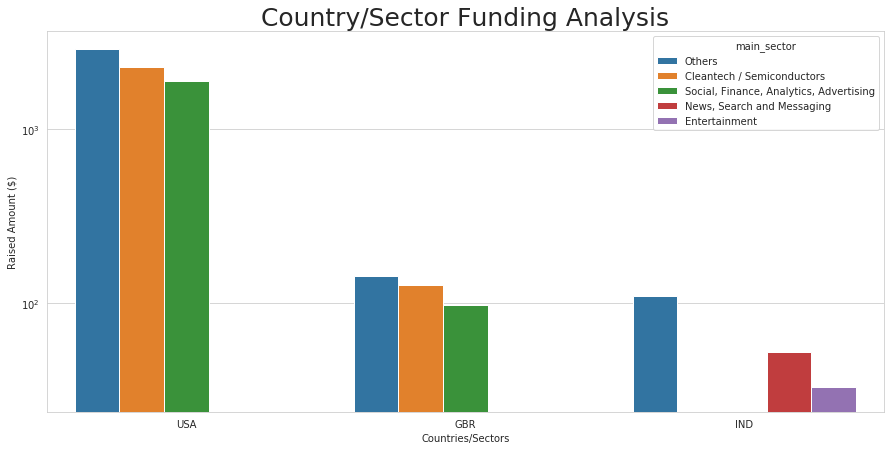

In [0]:
plt.figure(figsize=(15, 7))
plt.yscale('log')
snsPlot3 = sns.barplot(x='country', y='raised_amount_usd', hue="main_sector", data=sectorWisePerCountryDF)
snsPlot3.set(xlabel='Countries/Sectors', ylabel='Raised Amount ($)')
snsPlot3.set_title('Country/Sector Funding Analysis',fontsize =25)
plt.show()